<a href="https://colab.research.google.com/github/fahadrajput99/EDA-Using-Pandas/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
left=df[df.left==1]
left.shape

(3571, 10)

In [5]:
left=df[df.left==0]
left.shape

(11428, 10)

In [7]:
import seaborn as sns

<Axes: xlabel='salary'>

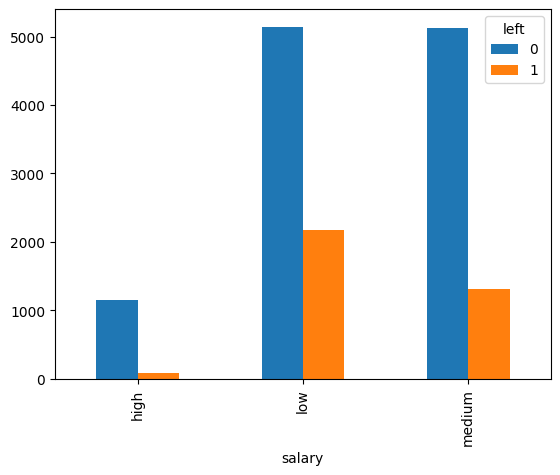

In [9]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
x_last=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
x=pd.get_dummies(x_last['salary'])

In [18]:
x = pd.concat([x_last, x], axis=1)

In [22]:
X=x.drop(['salary'], axis=1,inplace=True)

In [30]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [24]:
y=df['left']

In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
pre=LogisticRegression()

In [36]:
pre.fit(X_train,y_train)

LogisticRegression()

In [38]:
pre.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
pre.score(X_test,y_test)*100

76.6